## Imports ##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
current_path = '/content/drive/MyDrive/Colab Notebooks/FacialClustering'

## Feature extraction function ##

In [ ]:
current_directory = os.getcwd()
print("Current directory:", current_directory)

Current directory: /content


In [ ]:
# Load the Dataset
data_path = f'{current_path}/dataset/dataset'
image_files = []
labels = []

for file_name in os.listdir(data_path):
    if os.path.isfile(os.path.join(data_path, file_name)):
        image_files.append(os.path.join(data_path, file_name))
        labels.append(file_name)

# Feature Extraction
def extract_feature(image):
    # Apply any preprocessing if needed
    # Extract features using a pre-trained CNN or any other method
    # Placeholder function, replace with actual feature extraction
    feature_vector = np.random.rand(1000)  # Random feature vector, replace with actual features
    return feature_vector

feature_vectors = []
for image_file in image_files:
    image = cv2.imread(image_file)
    feature_vector = extract_feature(image)
    feature_vectors.append(feature_vector)

print(len(labels))

# # Print features and labels
# for i in range(len(labels)):
#     print("Label:", labels[i])
#     print("Feature Vector:", feature_vectors[i])

# Saving Feature Vectors (optional)
np.save(f'{current_path}/feature_vectors.npy', feature_vectors)
np.save(f'{current_path}/labels.npy', labels)

175


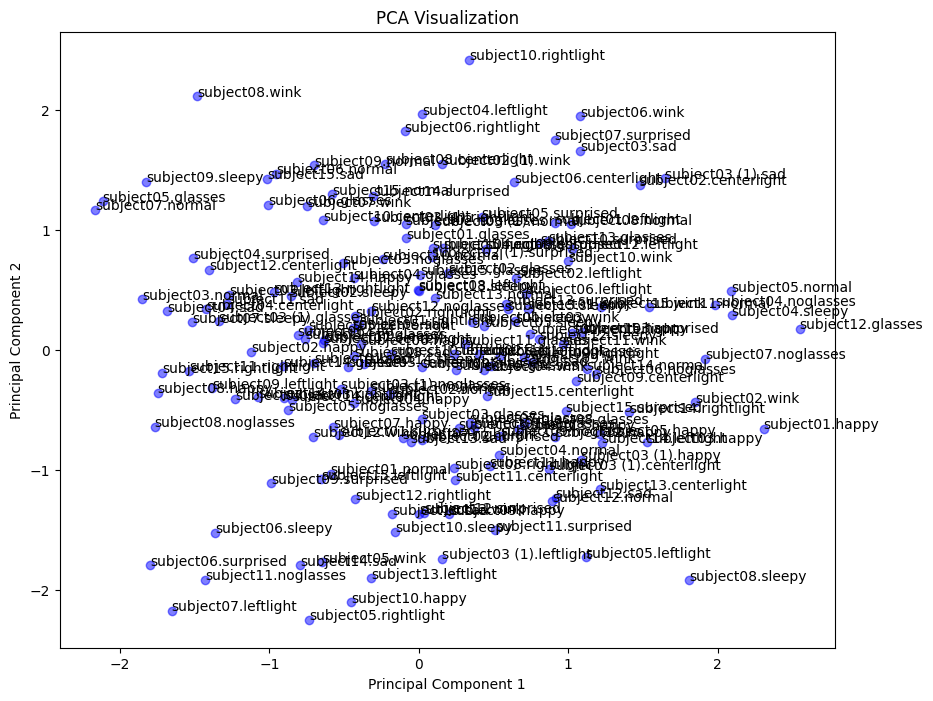

In [ ]:
# Load saved feature vectors and labels (if not already loaded)
# feature_vectors = np.load('feature_vectors.npy')
# labels = np.load('labels.npy')

# Dimension Reduction
pca = PCA(n_components=50)  # You can choose the number of components based on your dataset
reduced_features = pca.fit_transform(feature_vectors)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c='blue', alpha=0.5)
for i in range(len(labels)):
    plt.text(reduced_features[i, 0], reduced_features[i, 1], labels[i])
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


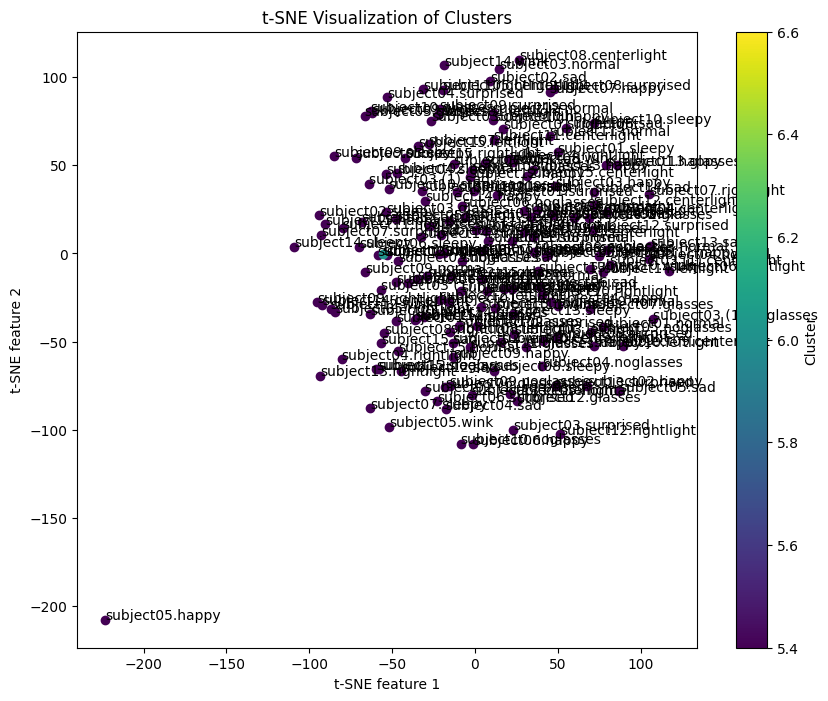

In [ ]:
# Clustering
kmeans = KMeans(n_clusters=15)  # You can choose the number of clusters based on your dataset
clusters = kmeans.fit_predict(reduced_features)

# Visualization
tsne = TSNE(n_components=3)
embedded_features = tsne.fit_transform(reduced_features)

# Plotting
plt.figure(figsize=(10, 8))
for i in range(len(embedded_features)):
    plt.scatter(embedded_features[i, 0], embedded_features[i, 1], c=clusters[i], cmap='viridis')
    plt.text(embedded_features[i, 0], embedded_features[i, 1], labels[i])
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(label='Cluster')
plt.show()
